### Slade Brooks
##### brooksl@mail.uc.edu
##### 03.10.2023
# AeroComputing Assignment 6

This code does a thing

In [279]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Part 1

Use symbolab to find derivatives:

$$
\text{v}(M) = \sqrt{\frac{\gamma +1}{\gamma -1}} \tan^{-1}{(\sqrt{\frac{\gamma -1}{\gamma +1}(M^2-1)})} - \tan^{-1}{(\sqrt{M^2-1})}
$$

$$
\dot{\text{v}}(M) = \frac{2\sqrt{M^2-1}}{\gamma M^3 - M^3 + 2M}
$$

$$
\ddot{\text{v}}(M) = \frac{2(-2\gamma M^4 + 2M^4 + 3\gamma M^2 - 3M^2 + 2)}{M^2(\gamma M^2 - M^2 +2)^2\sqrt{M^2-1}}
$$

# Part 2

In [280]:
# set up sympy
M, y = sp.symbols("M, y")
pran = (sp.sqrt((y+1)/(y-1)))*sp.atan(sp.sqrt((y-1)/(y+1)*(sp.Pow(M, 2) - 1))) - sp.atan(sp.sqrt(sp.Pow(M, 2) - 1))
prandot = sp.diff(pran, M)
pranddot = sp.diff(prandot, M)

In [281]:
# set up nums to loop through
gamma = 1.4
Ms = np.linspace(1, 5, 30)
deltaM = 0.01

In [282]:
# find real derivs
prandotreal = np.empty(len(Ms))
pranddotreal = np.empty(len(Ms))

for i in range(0, len(Ms)):
    prandotreal[i] = prandot.subs([(M, Ms[i]), (y, gam)])
    pranddotreal[i] = pranddot.subs([(M, Ms[i]), (y, gam)])

## Part A

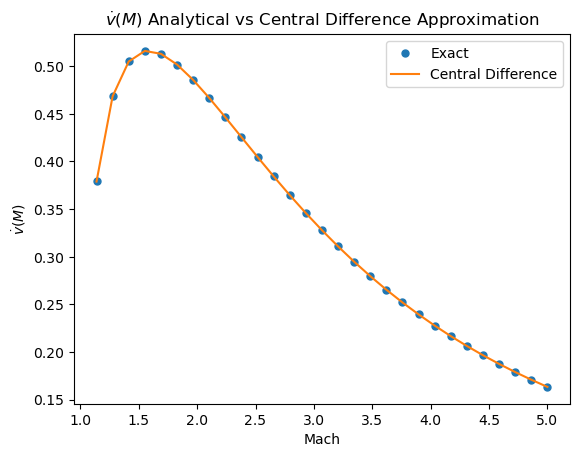

In [283]:
# central diff 1st deriv
def centdif1(f, Ms, dM, gam):
    return (f.subs([(M, (Ms + dM)), (y, gam)]) - f.subs([(M, (Ms - dM)), (y, gam)]))/(2*dM)

# make list of results
prandotCD = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(centdif1(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        prandotCD[i] = centdif1(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        prandotCD[i] = None

# plot it
plt.plot(Ms, prandotreal, label="Exact", marker="o", markersize=5, linestyle="None")
plt.plot(Ms, prandotCD, label="Central Difference", linestyle="-")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\dot{v}(M)$")
plt.title("$\dot{v}(M)$ Analytical vs Central Difference Approximation")
plt.show()

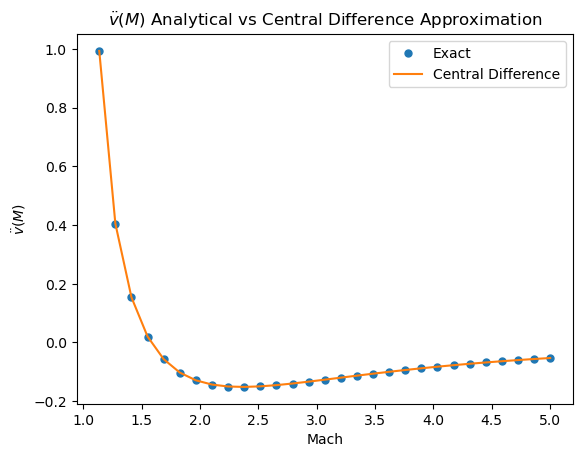

In [284]:
# central diff 2nd deriv
def centdif2(f, Ms, dM, gam):
    return (f.subs([(M, (Ms + dM)), (y, gam)]) - 2*f.subs([(M, Ms), (y, gam)]) + f.subs([(M, (Ms - dM)), (y, gam)]))/(dM**2)

# make list of results
pranddotCD = np.empty(len(Ms))

# loop and find deriv and approx
for i in range(0, len(Ms)):
    # make sure it's defined
    if type(centdif2(pran, Ms[i], deltaM, gamma)) != sp.core.add.Add:
        pranddotCD[i] = centdif2(pran, Ms[i], deltaM, gamma)
    else:
        # get rid of undefined points
        pranddotCD[i] = None

# plot it
plt.plot(Ms, pranddotreal, label="Exact", marker="o", markersize=5, linestyle="None")
plt.plot(Ms, pranddotCD, label="Central Difference", linestyle="-")
plt.legend()
plt.xlabel("Mach")
plt.ylabel("$\ddot{v}(M)$")
plt.title("$\ddot{v}(M)$ Analytical vs Central Difference Approximation")
plt.show()

## Part B

In [285]:
# 1st order forward 1st deriv

In [286]:
# 1st order forward 2nd deriv

## Part C

In [287]:
# 2nd order forward 1st deriv

In [288]:
# 2nd order forward 1st deriv